# CS 555: Homework 1
### Eric Stevens
### October 11, 2018


** This was ran with Python 2.7

In [3]:
import pynini
import re
from string import punctuation, ascii_letters, digits

from __future__ import print_function
from __future__ import unicode_literals

## Part 1: FSA to Regular Expression

1. /[ab]+(cd){2,3}e*fg?/ 

2. /[abj]+c[1-9]/

<span style="color:red">Comment:</span>


## Part 2: Regular Expression to FSA

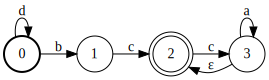

In [4]:
# init fst
fst = pynini.Fst()

# create symbol table
input_table = pynini.SymbolTable()
input_table.add_symbol("ε", key=0)
input_table.add_symbol("a")
input_table.add_symbol("b")
input_table.add_symbol("c")
input_table.add_symbol("d")



# set input and output tables
fst.set_input_symbols(input_table)
fst.set_output_symbols(input_table)

# declare states
for x in range(4): fst.add_state()
fst.set_start(0)
fst.set_final(2)

# build
# Arc(ilabel, olabel, weight, nextstate)
fst.add_arc(0, pynini.Arc(input_table.find("d"),input_table.find("d"),0, 0))
fst.add_arc(0, pynini.Arc(input_table.find("b"),input_table.find("b"),0, 1))
fst.add_arc(1, pynini.Arc(input_table.find("c"),input_table.find("c"),0, 2))
fst.add_arc(2, pynini.Arc(input_table.find("c"),input_table.find("c"),0, 3))
fst.add_arc(3, pynini.Arc(input_table.find("a"),input_table.find("a"),0, 3))
fst.add_arc(3, pynini.Arc(input_table.find("ε"),input_table.find("ε"),0, 2))


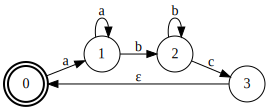

In [5]:
# init fst
fst = pynini.Fst()

# create symbol table
input_table = pynini.SymbolTable()
input_table.add_symbol("ε", key=0)
input_table.add_symbol("a")
input_table.add_symbol("b")
input_table.add_symbol("c")
input_table.add_symbol("d")



# set input and output tables
fst.set_input_symbols(input_table)
fst.set_output_symbols(input_table)

# declare states
for x in range(4): fst.add_state()
fst.set_start(0)
fst.set_final(0)

# build
# Arc(ilabel, olabel, weight, nextstate)
fst.add_arc(0, pynini.Arc(input_table.find("a"),input_table.find("a"),0, 1))
fst.add_arc(1, pynini.Arc(input_table.find("a"),input_table.find("a"),0, 1))
fst.add_arc(1, pynini.Arc(input_table.find("b"),input_table.find("b"),0, 2))
fst.add_arc(2, pynini.Arc(input_table.find("b"),input_table.find("b"),0, 2))
fst.add_arc(2, pynini.Arc(input_table.find("c"),input_table.find("c"),0, 3))
fst.add_arc(3, pynini.Arc(input_table.find("ε"),input_table.find("ε"),0, 0))


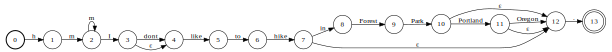

In [6]:
### SPEED FUNCTIONS =>

# Uses a list of symbols to make a symbol table
def tableMaker(theList, theSymbolTable):
    for x in theList: theSymbolTable.add_symbol(x)

# Simplifies adding of arcs by assuming no transduction and automating symbol lookup
def arcAdder(theFst, stateFrom, stateTo, symbol): 
    theFst.add_arc(stateFrom, pynini.Arc(input_table.find(symbol),input_table.find(symbol),0, stateTo))
    

# init fst
fst = pynini.Fst()

# create symbol table
symbolList = ["ε","h","m","I","like","dont","to","hike","in","Forest","Park","Portland","Oregon","."]
input_table = pynini.SymbolTable()
tableMaker(symbolList, input_table) # speed function above

# set input and output tables
fst.set_input_symbols(input_table)
fst.set_output_symbols(input_table)

# declare states
for x in range(14): fst.add_state()
fst.set_start(0)
fst.set_final(13)


# build main line of 
# arcAdder(theFst, stateFrom, stateTo, symbol)
arcAdder(fst, 0, 1, "h")
arcAdder(fst, 1, 2, "m")
arcAdder(fst, 2, 2, "m")
arcAdder(fst, 2, 3, "I")
arcAdder(fst, 3, 4, "dont")
arcAdder(fst, 4, 5, "like")
arcAdder(fst, 5, 6, "to")
arcAdder(fst, 6, 7, "hike")
arcAdder(fst, 7, 8, "in")
arcAdder(fst, 8, 9, "Forest")
arcAdder(fst, 9, 10, "Park")
arcAdder(fst, 10, 11, "Portland")
arcAdder(fst, 11, 12, "Oregon")
arcAdder(fst, 12, 13, ".")

# add epsilons
arcAdder(fst, 3, 4, "ε")
arcAdder(fst, 7, 12, "ε")
arcAdder(fst, 10, 12, "ε")
arcAdder(fst, 11, 12, "ε")



fst

<span style="color:red">Comment:</span>


## Part 3: ROT13

In [11]:
# Split the Alphabet
lowerCaseA = ascii_letters[:13]
lowerCaseB = ascii_letters[13:26]
upperCaseA = ascii_letters[26:26+13]
upperCaseB = ascii_letters[26+13:]

# non-transduced characters
rest_of_ascii = digits + '!"#$%&\'()*+,-./:;<=>?@\\^_`{|}~'


# cipher transduction string builder
inCipher = list(lowerCaseA + lowerCaseB + upperCaseA + upperCaseB + rest_of_ascii ) 
outCipher = list(lowerCaseB + lowerCaseA + upperCaseB + upperCaseA + rest_of_ascii ) 

# zip cipher strings into form accepted by pynini.string_map
zipCipher = []
for x in range(len(inCipher)):zipCipher.append([inCipher[x],outCipher[x]])

# build ROT13 FST using string_map
ROT13_FST = pynini.string_map(zipCipher).closure() 


# ROT13() takes a string as an input and returns its ROT13 transduction as a string
def ROT13(string): 
    ciphered_string = pynini.compose(string.strip(), ROT13_FST).stringify()
    return ciphered_string


# set 'output1' as result of ROT13 encription of input stirng
output1 = ROT13("NaqlJneubyVfVaGurNegZhfrhz")

# print the result
print(output1)

# Display ROT13_FST architecture
# ROT13_FST



Andy Warhol IsInTheArtMuseum


<span style="color:red">Comment:</span>

## Part 4: Counting Sonnets

In [81]:
# use 'urllib' to get file directly form web
import urllib
r = urllib.urlopen("http://www.gutenberg.org/cache/epub/1041/pg1041.txt")

# read file into string
text = r.read()
r.close

# use regular expression to get roman numerals into list form
sonnets = re.findall("\r\n\r\n[ IVCXL]+\r\n\r\n",text)

# length of the list will be number of sonnets
number_of_sonets = len(sonnets)

# print the number of sonnets:
print("There are %d sonets in the file." %number_of_sonets)



There are 154 sonets in the file.


<span style="color:red">Comment:</span>